In [1]:
import os
import glob
import librosa
import numpy as np

DATA_DIR = "/Users/pkompiel/python_scripts/asr4memory/asr-dataset-creator/data/dataset-merger/_output/eg_dataset_complete/data"  # Pfad zu deinem Audioordner

audio_files = sorted(glob.glob(os.path.join(DATA_DIR, "*.wav")))
durations = []  # Here we save the lenght in seconds of each audio file

for file in audio_files:
    audio, sr = librosa.load(file, sr=None)  # sr=None, so we get the original sample rate
    duration = len(audio) / sr
    durations.append(duration)

durations = np.array(durations)


In [2]:
print("Number of files: ", len(durations))
print("Minimum: {:.2f} seconds".format(durations.min()))
print("Maximum: {:.2f} seconds".format(durations.max()))
print("Average: {:.2f} seconds".format(durations.mean()))
print("Median: {:.2f} seconds".format(np.median(durations)))
print("Standard deviation: {:.2f} seconds".format(durations.std()))
print("95. Percentile {:.2f} seconds".format(np.percentile(durations, 95)))
print("99. Percentile: {:.2f} seconds".format(np.percentile(durations, 99)))

Number of files:  186993
Minimum: 0.04 seconds
Maximum: 381.76 seconds
Average: 5.04 seconds
Median: 4.68 seconds
Standard deviation: 2.92 seconds
95. Percentile 10.08 seconds
99. Percentile: 13.08 seconds


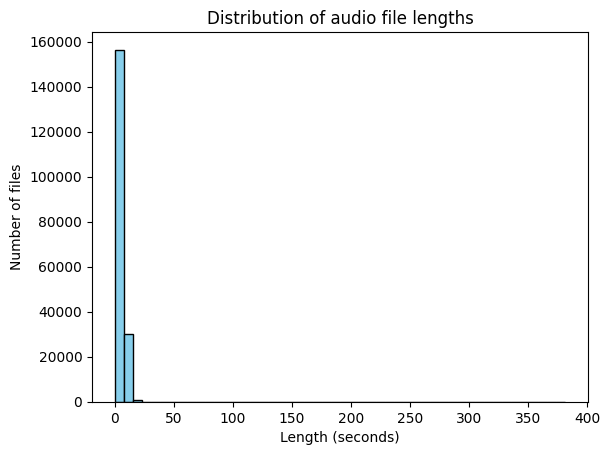

In [3]:
import matplotlib.pyplot as plt

plt.hist(durations, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Length (seconds)")
plt.ylabel("Number of files")
plt.title("Distribution of audio file lengths")
plt.show()

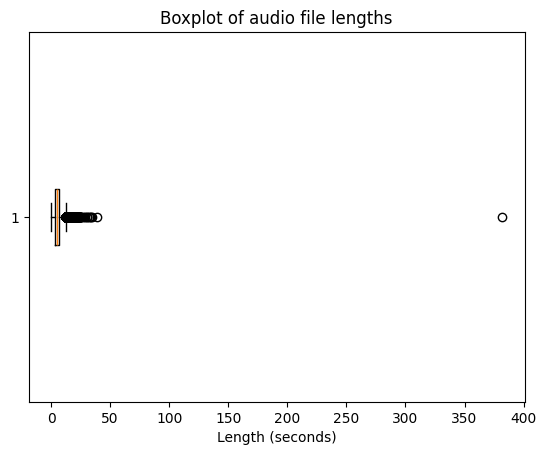

In [4]:
plt.boxplot(durations, vert=False)
plt.xlabel("Length (seconds)")
plt.title("Boxplot of audio file lengths")
plt.show()


In [ ]:
import h5py

with h5py.File("/Users/pkompiel/python_scripts/asr4memory/asr-dataset-creator/data/hdf-converter/_output/eg_dataset_complete_10sec.h5", "r") as hdf5_file:
    print("Content of the HDF5 file:")
    for key in hdf5_file.keys():
        print(key)
    audio_data = hdf5_file["audio_waveforms"][:]
    lengths = hdf5_file["lengths"][:]
    transcriptions = hdf5_file["transcription"][:]
    file_names = hdf5_file["file_name"][:]

print("Number of audio data:", len(audio_data))
print("First audio data:", audio_data[0])
print("First audio data name:", file_names[0].decode("utf-8"))   
print("First lenght (samples):", lengths[0])
print("First transcript", transcriptions[0].decode("utf-8"))

Content of the HDF5 file:
audio_waveforms
file_name
lengths
transcription
Number of audio data: 186993
First audio data: [-0.14071655 -0.13754272 -0.13421631 ...  0.          0.
  0.        ]
Last audio data: data/eg022_02_02_dataset_audio_segment_3.wav
First lenght (samples): 106880
First transcript äh, ja, ich fand das ja ganz, äh, toll, dass Sie so im Nachgang gesagt haben: Eigentlich fällt mir noch ganz viel ein.
